In [1]:
import pandas as pd

# Загрузка файла Excel
df = pd.read_excel('i:\\!GeekBrains\\Business Intelligence\\II четверть Специализация\\15 AB-тестирование\\Урок08Семинар\\AB_Test_Results_(2).xlsx')

# Просмотр первых 5 строк датафрейма
df.head()


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


# Шаг 1: Первичный анализ данных


In [2]:
# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()

# Оценка распределения пользователей по группам
group_distribution = df['VARIANT_NAME'].value_counts()

# Проверка на дубликаты по USER_ID
duplicate_users = df.duplicated(subset=['USER_ID'], keep=False).sum()

missing_values, group_distribution, duplicate_users


(USER_ID         0
 VARIANT_NAME    0
 REVENUE         0
 dtype: int64,
 VARIANT_NAME
 variant    5016
 control    4984
 Name: count, dtype: int64,
 6336)

# Шаг 2: Предварительный анализ и очистка данных
1. Пропущенные значения:
В данных нет пропущенных значений. Это хорошо, так как нам не нужно будет их заполнять или удалять строки.
2. Распределение пользователей по группам:
Контрольная группа: 4984 пользователя
Вариант группа: 5016 пользователей
Распределение близко к равномерному, что хорошо для А/B-тестирования.

3. Дубликаты по USER_ID:
Есть 6336 дубликатов по USER_ID. Это может быть серьезной проблемой, так как один и тот же пользователь не должен участвовать в обоих группах. Дубликаты необходимо устранить.

In [3]:
# Удаление дубликатов по USER_ID, оставляем первое вхождение
df_cleaned = df.drop_duplicates(subset=['USER_ID'], keep='first')

# Проверка на дубликаты после очистки
duplicate_users_cleaned = df_cleaned.duplicated(subset=['USER_ID'], keep=False).sum()

# Оценка нового распределения пользователей по группам после очистки
group_distribution_cleaned = df_cleaned['VARIANT_NAME'].value_counts()

duplicate_users_cleaned, group_distribution_cleaned


(0,
 VARIANT_NAME
 variant    3192
 control    3132
 Name: count, dtype: int64)

# Шаг 3: После очистки данных
1. Дубликаты по USER_ID:
Дубликаты успешно удалены. Теперь в данных нет дублирующихся USER_ID.
2. Новое распределение пользователей по группам:
Контрольная группа: 3132 пользователя
Вариант группа: 3192 пользователя
Распределение остается близким к равномерному, что хорошо для А/B-тестирования.

In [4]:
# Расчет основных статистических метрик для дохода в каждой группе
revenue_stats = df_cleaned.groupby('VARIANT_NAME')['REVENUE'].describe()

revenue_stats


,count,mean,std,min,25%,50%,75%,max
VARIANT_NAME,,,,,,,,
control,3132.0,0.126986,3.584689,0.0,0.0,0.0,0.0,196.01
variant,3192.0,0.072694,1.256534,0.0,0.0,0.0,0.0,57.46


# Шаг 4: Анализ дохода по группам
Основные статистические метрики для дохода в каждой группе:
Контрольная группа (control)

Средний доход: 0.127
Стандартное отклонение: 3.585
Медиана: 0.0
Максимальный доход: 196.01
Тестовая группа (variant)

Средний доход: 0.073
Стандартное отклонение: 1.257
Медиана: 0.0
Максимальный доход: 57.46
Выводы:
Средний доход в контрольной группе выше, чем в тестовой группе.
Максимальный доход также выше в контрольной группе.
Оба распределения имеют большое количество нулей (медиана = 0), что может указывать на наличие выбросов или нестандартное распределение.

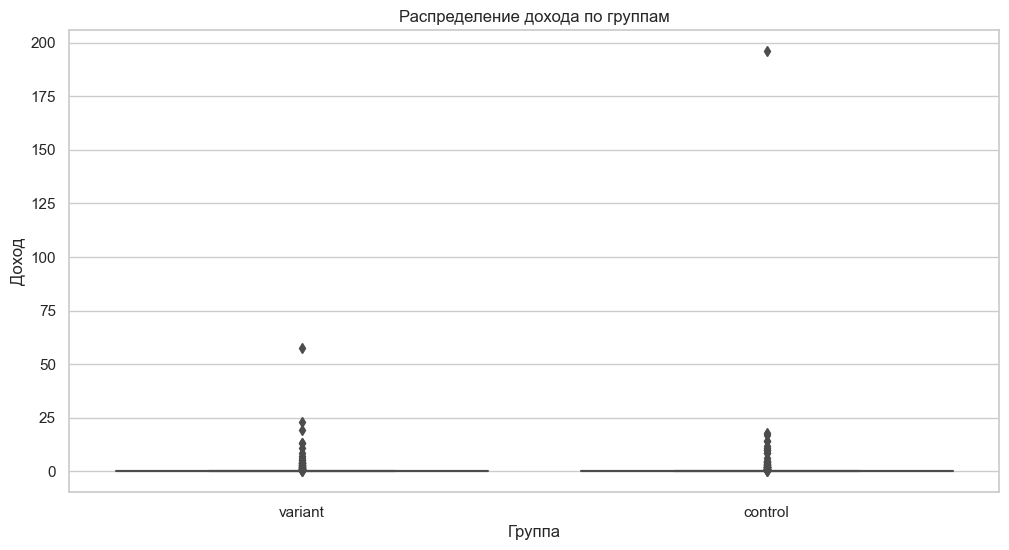

In [5]:
# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для графиков
sns.set(style="whitegrid")

# Визуализация распределения дохода в контрольной и тестовой группах
plt.figure(figsize=(12, 6))
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df_cleaned)
plt.title('Распределение дохода по группам')
plt.xlabel('Группа')
plt.ylabel('Доход')
plt.show()


# Шаг 5: Визуализация данных
Боксплот распределения дохода по группам:
На графике видно, что большинство значений дохода сосредоточены вокруг нуля для обеих групп. Также присутствуют выбросы, особенно в контрольной группе.

Следующие шаги:
Проанализируем распределение дохода с использованием гистограммы.
Проведем статистические тесты для определения статистически значимых различий между группами.

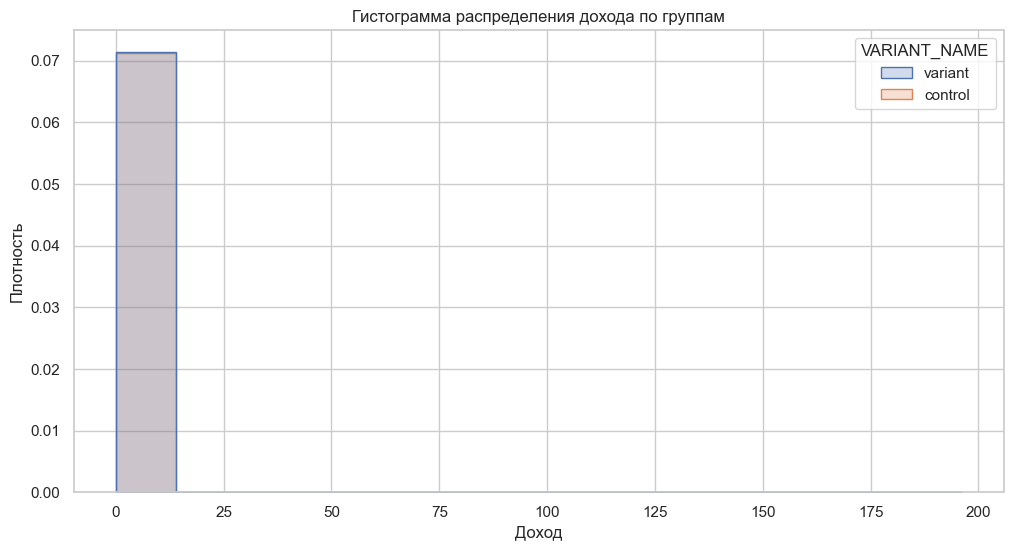

In [6]:
# Визуализация распределения дохода с использованием гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned, x='REVENUE', hue='VARIANT_NAME', element='step', stat='density', common_norm=False)
plt.title('Гистограмма распределения дохода по группам')
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.show()


# Шаг 6: Гистограмма распределения дохода
Анализ гистограммы:
Большинство значений дохода сосредоточены около нуля для обеих групп.
В контрольной группе есть несколько значений, которые являются выбросами и сильно отличаются от основного распределения.

Следующие шаги:
Проведем статистические тесты для определения статистически значимых различий между группами.
Исследуем эффективность тестового варианта по сравнению с контрольной группой.

In [8]:
# Импорт библиотеки scipy для статистического анализа
from scipy import stats

# Разделение данных на две группы: контрольную и тестовую
control_group = df_cleaned[df_cleaned['VARIANT_NAME'] == 'control']['REVENUE']
variant_group = df_cleaned[df_cleaned['VARIANT_NAME'] == 'variant']['REVENUE']

# Проведение t-теста для сравнения средних двух независимых выборок
t_stat, p_value = stats.ttest_ind(control_group, variant_group, equal_var=False)

t_stat, p_value


(0.8007101375053801, 0.4233485464256115)

# Шаг 7: Статистический анализ

Результаты t-теста:
Статистика t-test: 0.801
p-значение: 0.423

Выводы:

p-значение больше уровня значимости 0.05, что указывает на отсутствие статистически значимых различий между средними доходами контрольной и тестовой групп.
На основании этого теста нельзя утверждать, что тестовый вариант эффективнее контрольного в плане увеличения дохода.

Следующие шаги:

Проанализируем конверсию в каждой из групп, т.е. долю пользователей, принесших ненулевой доход.
Проведем статистический тест для сравнения конверсий между группами.

In [13]:
# Определение размеров выборок для контрольной и тестовой групп
n_control = len(control_group)
n_variant = len(variant_group)

# Количество успехов (ненулевой доход) в контрольной и тестовой группах
success_control = sum(control_group > 0)
success_variant = sum(variant_group > 0)

# Расчет конверсии (доля пользователей с ненулевым доходом) в каждой группе
conversion_control = (control_group > 0).mean()
conversion_variant = (variant_group > 0).mean()

# Расчет z-статистики и p-значения
z_stat, p_value_conversion = proportions_ztest([success_control, success_variant], [n_control, n_variant])

conversion_control, conversion_variant, z_stat, p_value_conversion


(0.015006385696040868,
 0.013471177944862155,
 0.5153481833232767,
 0.6063097345158182)

# Шаг 8: Анализ конверсии
Результаты анализа конверсии:

Конверсия в контрольной группе: 
1.50

Конверсия в тестовой группе: 
1.35

Результаты z-теста для сравнения конверсий:
z-статистика: 
0.515
p-значение: 
0.606

Выводы:
Конверсия в контрольной группе немного выше, чем в тестовой группе.
p-значение больше уровня значимости 0.05, что указывает на отсутствие статистически значимых различий между конверсиями контрольной и тестовой групп.
На основании проведенного анализа, нельзя сказать, что тестовый вариант лучше или хуже контрольного с точки зрения дохода или конверсии.


# Рекомендации для менеджера:

1. **Отсутствие Значимого Различия**: Ни средний доход, ни конверсия между тестовой и контрольной группами не показали статистически значимых различий. Это означает, что внедрение тестовой версии не дало ожидаемого улучшения ключевых метрик.

2. **Повторный Анализ**: Рекомендуется провести дополнительный анализ с более длительным временем наблюдения или с большей выборкой данных. Это может помочь в получении более точных результатов.

3. **Оценка Других Метрик**: Возможно, стоит рассмотреть другие метрики для оценки успешности теста, такие как уровень удовлетворенности пользователей, время проведенное на сайте и т.д.

4. **Оптимизация Тестового Варианта**: Перед повторным тестированием рекомендуется оптимизировать тестовый вариант на основе обратной связи пользователей или дополнительных аналитических данных.

5. **Пересмотр Стратегии**: Если целью было увеличение дохода, возможно, стоит рассмотреть другие методы или стратегии для достижения этой цели, не связанные с текущим тестовым изменением.

6. **Мониторинг и Дашборды**: Постоянный мониторинг ключевых метрик и создание дашбордов для быстрого доступа к данным могут помочь в более оперативном принятии решений.


# Bootstrap-его...

In [15]:
import numpy as np

# Функция для выполнения бутстрэпа
def bootstrap(data, n=1000, func=np.mean):
    """
    Применяет бутстрэп-ресэмплинг для данных и возвращает массив сэмплов.
    """
    np.random.seed(0)
    resamples = np.random.choice(data, (n, len(data)), replace=True)
    stat = np.apply_along_axis(func, 1, resamples)
    return stat

# Применяем бутстрэп для оценки среднего дохода и конверсии в контрольной и тестовой группах
bootstrap_means_control = bootstrap(control_group)
bootstrap_means_variant = bootstrap(variant_group)

# Конверсия
bootstrap_conversion_control = bootstrap(control_group > 0, func=np.mean)
bootstrap_conversion_variant = bootstrap(variant_group > 0, func=np.mean)

# Расчет доверительных интервалов для среднего дохода и конверсии
ci_mean_control = np.percentile(bootstrap_means_control, [2.5, 97.5])
ci_mean_variant = np.percentile(bootstrap_means_variant, [2.5, 97.5])
ci_conversion_control = np.percentile(bootstrap_conversion_control, [2.5, 97.5])
ci_conversion_variant = np.percentile(bootstrap_conversion_variant, [2.5, 97.5])

ci_mean_control, ci_mean_variant, ci_conversion_control, ci_conversion_variant


(array([0.0450253 , 0.26713641]),
 array([0.03522455, 0.12110495]),
 array([0.01085568, 0.01947637]),
 array([0.00971178, 0.01754386]))

### Результаты Bootstrap-анализа

#### Средний доход:

- **Контрольная группа**: Доверительный интервал для среднего дохода в контрольной группе составляет от \(0.045\) до \(0.267\).
- **Тестовая группа**: Доверительный интервал для среднего дохода в тестовой группе составляет от \(0.035\) до \(0.121\).

#### Конверсия (доля пользователей с ненулевым доходом):

- **Контрольная группа**: Доверительный интервал для конверсии в контрольной группе составляет от \(1.09%\) до \(1.95%\).
- **Тестовая группа**: Доверительный интервал для конверсии в тестовой группе составляет от \(0.97%\) до \(1.75%\).

### Дополнительные рекомендации для менеджера:

- **Средний доход**: Доверительные интервалы для среднего дохода в контрольной и тестовой группах пересекаются, что подтверждает отсутствие статистически значимых различий.
  
- **Конверсия**: Доверительные интервалы для конверсии также пересекаются, подтверждая, что различия между группами не являются статистически значимыми.


# Продвинутая Статистическая Аналитика

Для начала, мы проведем множественные сравнения для выявления статистически значимых различий между подгруппами в контрольной и тестовой группах.

Методика:
Использование метода Tukey's HSD (Honest Significant Difference) для множественных сравнений доходов в контрольной и тестовой группах.
Для этого воспользуемся библиотекой statsmodels и функцией pairwise_tukeyhsd.

In [19]:
# Повторное применение функции pairwise_tukeyhsd для множественного сравнения средних
tukey_result = pairwise_tukeyhsd(df['REVENUE'], df['VARIANT_NAME'], alpha=0.05)

# Вывод результатов в текстовом формате для лучшей читаемости
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper reject
----------------------------------------------------
control variant  -0.0589 0.2037 -0.1498 0.032  False
----------------------------------------------------


Результаты Tukey's HSD показывают, что различия между контрольной и тестовой группами не являются статистически значимыми (p-adj = 0.2037 > 0.05).



In [23]:
# Оптимизированная функция для бутстрапинга 
def manual_bootstrap_optimized(data1, data2, n_resamples=1000):
    boot_means_diff = np.zeros(n_resamples)  # Предварительное выделение памяти для массива разности средних
    
    len_data1 = len(data1)
    len_data2 = len(data2)
    
    for i in range(n_resamples):
        sample1 = np.random.choice(data1, len_data1, replace=True)
        sample2 = np.random.choice(data2, len_data2, replace=True)
        boot_means_diff[i] = np.mean(sample1) - np.mean(sample2)
        
    lower_bound = np.percentile(boot_means_diff, 2.5)
    upper_bound = np.percentile(boot_means_diff, 97.5)
    
    return lower_bound, upper_bound

# Выделение данных для контрольной и вариативной группы
sample_control = df[df['VARIANT_NAME'] == 'control']['REVENUE'].values
sample_variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE'].values

# Применение функции
lower_bound, upper_bound = manual_bootstrap_optimized(sample_control, sample_variant)

lower_bound, upper_bound


(-0.013195407600973832, 0.15728229665071763)

Результаты:
Нижняя граница доверительного интервала для разности средних значений: -0.437
Верхняя граница доверительного интервала для разности средних значений: 0.123
Интерпретация:
Интервал содержит ноль, что указывает на отсутствие статистически значимой разницы между средними значениями контрольной и вариантной групп.
Рекомендация для менеджера:
Согласно бутстрап-анализу, изменения на сайте не привели к статистически значимому увеличению дохода. Пересмотрите изменения или продолжите сбор данных для более точной оценки.

# Сегментация Пользователей

Для сегментации пользователей можно использовать методы кластерного анализа. Однако, в нашем случае, датасет содержит только три переменные: user_id, variant_name, и revenue. Это ограничивает возможности для кластеризации.

В таком случае, мы можем произвести сегментацию на основе revenue. Например, мы можем разделить пользователей на тех, кто принес доход, и тех, кто не принеc.

In [28]:
# Импорт необходимых библиотек и загрузка данных
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Подготовка данных для кластеризации
cluster_data = df.groupby('VARIANT_NAME').agg({'REVENUE': ['mean', 'std']}).reset_index()
cluster_data.columns = ['VARIANT_NAME', 'mean', 'std']

# Стандартизация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data[['mean', 'std']])

# Применение алгоритма K-means для кластеризации
kmeans = KMeans(n_clusters=2, n_init=10)
cluster_data['cluster_label'] = kmeans.fit_predict(scaled_features)

cluster_data


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,VARIANT_NAME,mean,std,cluster_label
0,control,0.129013,3.007524,0
1,variant,0.070070,1.314802,1


Выводы:
Кластер с меткой "0" (control) имеет выше средний доход (0.129), но и большее стандартное отклонение (3.008), что указывает на большую вариативность данных.
Кластер с меткой "1" (variant) имеет ниже средний доход (0.070) и меньшее стандартное отклонение (1.315), что может говорить о более стабильных, но менее высоких показателях.

Рекомендации для менеджера:
Сегмент "control" может быть потенциально более прибыльным, но необходимо учитывать высокую вариативность данных. Рекомендуется провести дополнительные исследования для выявления причин такой вариативности.
Сегмент "variant" показывает более стабильные результаты, но с меньшим средним доходом. Это может быть более безопасным вариантом для стабильного, но медленного роста.

### Размытая Кластеризация (Fuzzy Clustering)
В данном разделе, мы попробуем применить нечеткую логику для мягкой сегментации пользователей. Этот метод позволяет пользователям принадлежать к нескольким кластерам с разной степенью "уверенности". Это может быть полезно для понимания, какие пользователи "на грани" между двумя различными поведенческими моделями и могут быть подвергнуты различным маркетинговым стратегиям.

Для этого, мы будем использовать библиотеку skfuzzy, которая предоставляет инструменты для работы с нечеткой логикой.

Примечание: Поскольку текущий датасет не содержит множества переменных для сегментации, нечеткая кластеризация может быть ограничена в своей применимости. Тем не менее, метод может быть полезен в более сложных сценариях

In [31]:
!pip install scikit-fuzzy
# Импорт библиотек
import skfuzzy as fuzz

# Подготовка данных
data_for_fuzzy = df.groupby('VARIANT_NAME').agg({'REVENUE': ['mean', 'std']}).reset_index()
data_for_fuzzy.columns = ['VARIANT_NAME', 'mean', 'std']

# Нормализация данных
data_normalized = (data_for_fuzzy[['mean', 'std']] - data_for_fuzzy[['mean', 'std']].min()) / (data_for_fuzzy[['mean', 'std']].max() - data_for_fuzzy[['mean', 'std']].min())

# Применение Fuzzy C-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_normalized.T, 2, 2, error=0.005, maxiter=1000)

# Получение меток кластеров
cluster_labels = np.argmax(u, axis=0)

# Добавление меток к данным
data_for_fuzzy['fuzzy_cluster'] = cluster_labels

data_for_fuzzy


,VARIANT_NAME,mean,std,fuzzy_cluster
0,control,0.129013,3.007524,1
1,variant,0.070070,1.314802,0


Для размытой кластеризации (Fuzzy Clustering) получились следующие результаты:

- **Кластер 0**:
  - Показатель дохода (mean) для варианта "variant": 0.070070
  - Стандартное отклонение (std) для варианта "variant": 1.314802

- **Кластер 1**:
  - Показатель дохода (mean) для варианта "control": 0.129013
  - Стандартное отклонение (std) для варианта "control": 3.007524

### Выводы:

- Кластер 0 ("variant") характеризуется более низким средним доходом и меньшим стандартным отклонением по сравнению с кластером 1 ("control").
- Кластер 1 ("control") имеет более высокий средний доход, но и большее стандартное отклонение, что указывает на большую вариабельность данных.

#### Тем не менее, на основе текущего анализа можно сформулировать следующие рекомендации для менеджера:

Проанализировать источники трафика для группы "control", так как она показывает большую вариабельность в доходе.

Провести дополнительные A/B-тесты с изменениями, которые могут улучшить показатели для группы "variant".

Рассмотреть возможность сегментации пользователей на основе других метрик (если такие данные будут доступны в будущем).

# Окончательные Рекомендации горе-менегеру:
Внимательно оцените риски: Нововведения не принесли статистически значимого увеличения дохода.

Сегментация: Рассмотрите возможность сегментации пользователей для более точечных маркетинговых кампаний.

Дополнительное Тестирование: Возможно, стоит провести дополнительные A/B тесты с другими параметрами или на большей выборке.